                                                text
0  A mold extractor assembly for use with a concr...
1  A mold assembly for forming concrete products ...
2  A mold transfer assembly comprises a carriage ...
3  In an overlock sewing machine, a main shaft fi...
4  A overlock sewing machine includes a switch li...


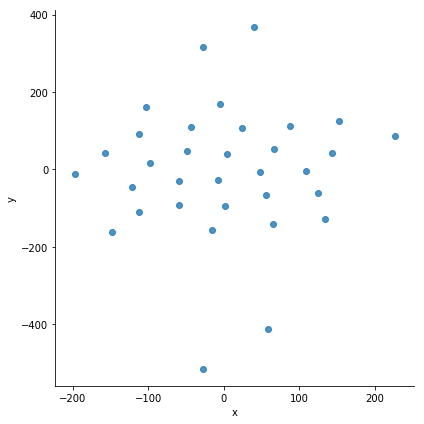

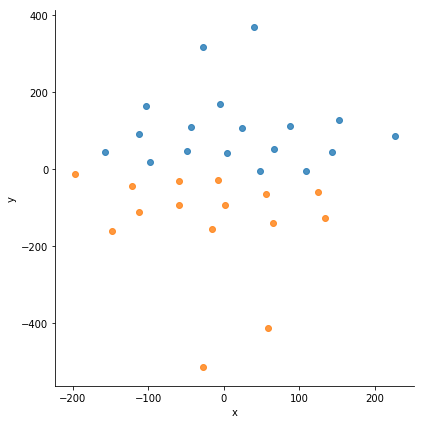

,cluster,x,y
0,1,2.207625,-94.622655
1,0,87.707430,111.460065
2,1,-15.121107,-155.512346
3,0,142.470978,42.872327
4,0,-48.844014,46.800101
5,0,-102.981881,162.119466
6,0,151.746156,126.230701
7,0,-97.491362,16.793175
8,1,-112.566567,-111.235725
9,1,56.059554,-65.617522


In [30]:
# 샘플데이터 생성
import numpy as np

#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
#t-sne
from sklearn.manifold import TSNE

import pandas as pd
import xlrd

load = pd.read_excel('sibal.xlsx')
print(load.head())


#for i in range(50):
#    news['data'][i] = news['data'][i][:10000]
 
x_data = load.text

 
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(x_data)

X = tfidf_matrix.toarray()

#T-SNE 차원축소 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors_set=model.fit_transform(X) 

#print(vectors_set)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in vectors_set],
                   "y": [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)

plt.show()

# K-means 구현
# 4개의 군집으로 그룹화

import tensorflow as tf

# 모든 데이터를 상수 텐서로 옮김
vectors = tf.constant(vectors_set)
# 초기 단계 : 중심 k(4)개를 입력데이터에서 무작위로 선택 
# 무작위 선택이라는 것이 어떤 의미일까
k = 2
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))
# vector.get_shape(), centroides.get_shape()
# 위 주석으로 각 텐서의 구조를 확인해볼 수 있음
 
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

# 할당 단계 : 유클리드 제곱거리 사용
diff = tf.subtract(expanded_vectors, expanded_centroides)
sqr = tf.square(diff)
distances = tf.reduce_sum(sqr, 2)
assignments = tf.argmin(distances,0)

# 업데이트 : 새로운 중심 계산
means = tf.concat(
                  [tf.reduce_mean(
                      tf.gather(vectors,
                                tf.reshape(
                                    tf.where(tf.equal(assignments, c))
                                    ,[1, -1])
                                )
                      , reduction_indices=[1]) for c in range(k)],0)

update_centroides = tf.assign(centroides, means)

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(500):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])


# assignment_values 텐서의 결과를 확인

data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)

#hue 없애면 k-mean 없어짐
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False,logistic=True)
           
plt.show()
df.head(10)

In [38]:
from sklearn import linear_model, datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,normalize
from sklearn import preprocessing

# import some data to play with
Y = df.cluster
X = df.drop(['cluster'],axis=1)

Y = df['cluster']
min_max_scaler_y = preprocessing.MinMaxScaler()
Y = min_max_scaler_y.fit_transform(Y)


X = df.drop(['cluster'],axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)


logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X, Y)

logreg.score(X,Y)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


1.0

In [45]:
x_test = [-118.3884215 , 19.83382193]
  
logreg.predict(x_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.])